In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import tensorflow as tf
import json
import csv

from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation



In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]='0'
os.environ["CUDA_VISIBLE_DEVICES"]='1'

In [3]:
axis = pd.read_csv('/home/master/Jibum/Motion_Show/IMU Data/train.csv')
axis = axis.drop(columns=['Robot_Reference.X','Robot_Reference.Y','Robot_Reference.Z','TimeStamp'])
axis

,label,Robot_Hips.X,Robot_Hips.Y,Robot_Hips.Z,Robot_LeftUpLeg.X,Robot_LeftUpLeg.Y,Robot_LeftUpLeg.Z,Robot_LeftLeg.X,Robot_LeftLeg.Y,Robot_LeftLeg.Z,...,Robot_RightHandRing1.Z,Robot_RightHandRing2.X,Robot_RightHandRing2.Y,Robot_RightHandRing2.Z,Robot_RightHandRing3.X,Robot_RightHandRing3.Y,Robot_RightHandRing3.Z,Robot_RightHandRing4.X,Robot_RightHandRing4.Y,Robot_RightHandRing4.Z
0,sit,0.014469,0.657318,-0.174980,-0.087715,0.570961,-0.207636,-0.258852,0.485350,0.207280,...,0.371302,0.179001,0.694311,0.406255,0.168793,0.675330,0.430465,0.160667,0.659863,0.448582
1,sit,0.015042,0.655393,-0.171119,-0.087102,0.568806,-0.203293,-0.257881,0.486372,0.212413,...,0.367667,0.178288,0.691410,0.402538,0.168233,0.672269,0.426685,0.160227,0.656680,0.444751
2,sit,0.015036,0.655131,-0.170547,-0.087129,0.568532,-0.202617,-0.257926,0.486574,0.213176,...,0.367148,0.178188,0.690728,0.402009,0.168149,0.671567,0.426147,0.160155,0.655963,0.444205
3,sit,0.015036,0.655131,-0.170547,-0.087129,0.568532,-0.202617,-0.257926,0.486574,0.213176,...,0.367148,0.178188,0.690728,0.402009,0.168149,0.671567,0.426147,0.160155,0.655963,0.444205
4,sit,0.015032,0.655023,-0.170247,-0.087141,0.568422,-0.202286,-0.257976,0.486619,0.213522,...,0.366851,0.178178,0.690355,0.401700,0.168150,0.671176,0.425828,0.160164,0.655559,0.443879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42292,stand,0.001410,1.111354,0.002986,-0.102953,1.022457,-0.010106,-0.115838,0.566955,-0.043646,...,0.041847,0.323842,0.910878,0.040385,0.328610,0.878884,0.038325,0.330991,0.853931,0.036055
42293,stand,0.001410,1.111354,0.002986,-0.102953,1.022457,-0.010106,-0.115838,0.566955,-0.043646,...,0.041847,0.323842,0.910878,0.040385,0.328610,0.878884,0.038325,0.330991,0.853931,0.036055
42294,stand,0.001403,1.111349,0.003021,-0.102963,1.022458,-0.010089,-0.115863,0.566964,-0.043723,...,0.041813,0.323949,0.910905,0.040348,0.328716,0.878912,0.038285,0.331097,0.853958,0.036016
42295,stand,0.001390,1.111345,0.003053,-0.102978,1.022459,-0.010077,-0.115856,0.566971,-0.043804,...,0.041855,0.324004,0.910924,0.040391,0.328772,0.878931,0.038331,0.331152,0.853977,0.036063


In [4]:
axis['label'].value_counts()

stand    16026
sit      14948
walk     11323
Name: label, dtype: int64

In [5]:
len(axis['label'])

42297

In [6]:
axis.columns[:28]

Index(['label', 'Robot_Hips.X', 'Robot_Hips.Y', 'Robot_Hips.Z',
       'Robot_LeftUpLeg.X', 'Robot_LeftUpLeg.Y', 'Robot_LeftUpLeg.Z',
       'Robot_LeftLeg.X', 'Robot_LeftLeg.Y', 'Robot_LeftLeg.Z',
       'Robot_LeftFoot.X', 'Robot_LeftFoot.Y', 'Robot_LeftFoot.Z',
       'Robot_LeftToeBase.X', 'Robot_LeftToeBase.Y', 'Robot_LeftToeBase.Z',
       'Robot_RightUpLeg.X', 'Robot_RightUpLeg.Y', 'Robot_RightUpLeg.Z',
       'Robot_RightLeg.X', 'Robot_RightLeg.Y', 'Robot_RightLeg.Z',
       'Robot_RightFoot.X', 'Robot_RightFoot.Y', 'Robot_RightFoot.Z',
       'Robot_RightToeBase.X', 'Robot_RightToeBase.Y', 'Robot_RightToeBase.Z'],
      dtype='object')

In [7]:
axisX = axis.iloc[:,1:28]
axisY = axis['label']

In [8]:
print(type(axisY))
print(axisY.shape)

<class 'pandas.core.series.Series'>
(42297,)


In [9]:
print(type(axisX))
print(type(axisY))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [10]:
MMS = MinMaxScaler() # MinMaxScaler
le = LabelEncoder() # LabelEncoder
enc = OneHotEncoder() # OneHotEncoder

In [43]:
le.fit(axisY)
label = le.transform(axisY)
print(label, type(label))
print(le.classes_)
print(label, le.classes_)
#label = np_utils.to_categorical(label)

[0 0 0 ... 1 1 1] <class 'numpy.ndarray'>
['sit' 'stand' 'walk']
[0 0 0 ... 1 1 1] ['sit' 'stand' 'walk']


In [44]:
print(label.shape)

(42297,)


In [45]:
import imblearn
from collections import Counter
print(imblearn.__version__)

def count_and_plot(label):
    counter = Counter(label)
    
    for i,j in counter.items():
        print("Class = %d, n = %d (%.3f%%)" % (i, j, j/len(axisY)*100))
        
    plt.bar(counter.keys(), counter.values())
    plt.show()

0.8.1


Class = 0, n = 14948 (35.341%)
Class = 2, n = 11323 (26.770%)
Class = 1, n = 16026 (37.889%)


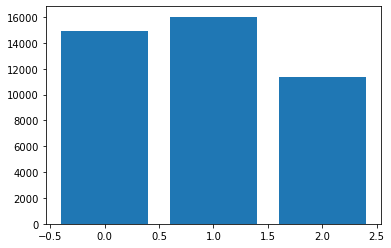

In [46]:
count_and_plot(label)

Class = 0, n = 16026 (37.889%)
Class = 2, n = 16026 (37.889%)
Class = 1, n = 16026 (37.889%)


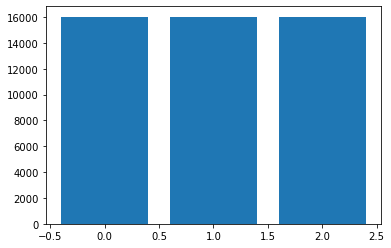

In [15]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(axisX,label)
count_and_plot(y_resampled)

In [16]:
print(axisX.shape)
print(axisY.shape)
print(label.shape)
print(X_resampled.shape)
print(y_resampled.shape)

(42297, 27)
(42297,)
(42297,)
(48078, 27)
(48078,)


In [17]:
X_resampled

,Robot_Hips.X,Robot_Hips.Y,Robot_Hips.Z,Robot_LeftUpLeg.X,Robot_LeftUpLeg.Y,Robot_LeftUpLeg.Z,Robot_LeftLeg.X,Robot_LeftLeg.Y,Robot_LeftLeg.Z,Robot_LeftFoot.X,...,Robot_RightUpLeg.Z,Robot_RightLeg.X,Robot_RightLeg.Y,Robot_RightLeg.Z,Robot_RightFoot.X,Robot_RightFoot.Y,Robot_RightFoot.Z,Robot_RightToeBase.X,Robot_RightToeBase.Y,Robot_RightToeBase.Z
0,0.014469,0.657318,-0.174980,-0.087715,0.570961,-0.207636,-0.258852,0.485350,0.207280,-0.270620,...,-0.206519,0.239237,0.563264,0.235140,0.234115,0.101813,0.307666,0.246179,-0.010447,0.399674
1,0.015042,0.655393,-0.171119,-0.087102,0.568806,-0.203293,-0.257881,0.486372,0.212413,-0.269969,...,-0.202244,0.239013,0.565066,0.239753,0.234339,0.104257,0.316286,0.246404,-0.007073,0.409416
2,0.015036,0.655131,-0.170547,-0.087129,0.568532,-0.202617,-0.257926,0.486574,0.213176,-0.270099,...,-0.201541,0.238677,0.565114,0.240546,0.233805,0.104378,0.317505,0.245791,-0.006864,0.410750
3,0.015036,0.655131,-0.170547,-0.087129,0.568532,-0.202617,-0.257926,0.486574,0.213176,-0.270099,...,-0.201541,0.238677,0.565114,0.240546,0.233805,0.104378,0.317505,0.245791,-0.006864,0.410750
4,0.015032,0.655023,-0.170247,-0.087141,0.568422,-0.202286,-0.257976,0.486619,0.213522,-0.270155,...,-0.201181,0.238487,0.565081,0.240956,0.233523,0.104367,0.318038,0.245463,-0.006849,0.411320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48073,0.000423,1.102712,-0.016954,-0.104597,1.014280,-0.027642,-0.016873,0.594671,0.130441,0.048492,...,-0.042631,0.132040,0.562490,-0.062917,0.020478,0.245496,-0.387327,-0.040915,0.114840,-0.402082
48074,0.018186,1.106193,-0.001506,-0.084583,1.014921,-0.009921,-0.145633,0.566092,-0.068626,-0.086386,...,-0.008396,0.057543,0.581865,0.096289,-0.005397,0.123504,0.160753,-0.002728,0.037506,0.278260
48075,-0.006496,1.106146,0.001789,-0.121335,1.030137,0.001471,-0.113435,0.584533,0.102173,-0.086860,...,-0.027863,0.066927,0.553442,-0.054853,0.062376,0.186109,-0.343375,0.060033,0.047757,-0.298015
48076,-0.002408,1.106574,-0.013469,-0.107362,1.018873,-0.029431,-0.069889,0.563663,-0.034337,-0.023130,...,-0.023976,0.139576,0.585271,0.113926,0.080612,0.213647,-0.162839,0.082652,0.073977,-0.121852


In [18]:
y_resampled = np_utils.to_categorical(y_resampled)

In [19]:
# X_resampled = MMS.fit_transform(X_resampled)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
scaler = StandardScaler() #99.17
sc = RobustScaler() #99.10
nor = Normalizer() #96.87
X_resampled = scaler.fit_transform(X_resampled)

In [20]:
print(y_resampled)
print(X_resampled)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[ 0.61077266 -1.88690526 -1.72449221 ...  1.30980482 -0.82085199
   0.66458706]
 [ 0.6337562  -1.89789109 -1.66959817 ...  1.3120027  -0.73853323
   0.70054143]
 [ 0.63352218 -1.89938273 -1.6614729  ...  1.30602837 -0.73343776
   0.70546631]
 ...
 [-0.2303885   0.67342476  0.7887448  ... -0.50247742  0.59917071
  -1.9104397 ]
 [-0.06636459  0.67586553  0.57181227 ... -0.28225742  1.23886675
  -1.260256  ]
 [-0.92012199  0.71114944  0.20107878 ... -1.18409914 -0.28401264
  -0.26693809]]


In [21]:
print("독립변수 : {}".format(X_resampled.shape))
print("종속변수 : {}".format(y_resampled.shape))

독립변수 : (48078, 27)
종속변수 : (48078, 3)


In [22]:
def split(data,target):
    x_train_all, x_test, y_train_all, y_test = train_test_split(data, target, stratify=target, test_size=0.2, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
    return x_train_all, x_train, x_val, x_test, y_train_all, y_train, y_val, y_test
    

In [23]:
from tensorflow import keras

def create_model():
    model = Sequential([
        keras.layers.Dense(units=500, activation='sigmoid', input_shape=(27,)),
        keras.layers.Dense(units=250, activation='relu'),
        keras.layers.Dense(units=125, activation='relu'),
        keras.layers.Dense(units=3, activation='softmax') 
    ])
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [40]:
x_train_all, x_train, x_val, x_test, y_train_all, y_train, y_val, y_test = split(X_resampled,y_resampled)
print(x_train_all.shape)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train_all.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(38462, 27)
(30769, 27)
(7693, 27)
(9616, 27)
(38462, 3)
(30769, 3)
(7693, 3)
(9616, 3)


In [27]:
model = create_model()
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

history = model.fit(x_train,y_train, epochs=100, validation_data=(x_val,y_val),callbacks=[early_stop])


Epoch 1/100
962/962 [==============================] - 3s 2ms/step - loss: 0.2579 - accuracy: 0.9193 - val_loss: 0.1185 - val_accuracy: 0.9558
Epoch 2/100
962/962 [==============================] - 2s 2ms/step - loss: 0.1077 - accuracy: 0.9630 - val_loss: 0.0867 - val_accuracy: 0.9726
Epoch 3/100
962/962 [==============================] - 2s 2ms/step - loss: 0.0886 - accuracy: 0.9718 - val_loss: 0.0721 - val_accuracy: 0.9796
Epoch 4/100
962/962 [==============================] - 2s 2ms/step - loss: 0.0792 - accuracy: 0.9764 - val_loss: 0.0646 - val_accuracy: 0.9810
Epoch 5/100
962/962 [==============================] - 2s 2ms/step - loss: 0.0708 - accuracy: 0.9792 - val_loss: 0.0618 - val_accuracy: 0.9817
Epoch 6/100
962/962 [==============================] - 2s 2ms/step - loss: 0.0683 - accuracy: 0.9796 - val_loss: 0.0555 - val_accuracy: 0.9821
Epoch 7/100
962/962 [==============================] - 2s 2ms/step - loss: 0.0636 - accuracy: 0.9808 - val_loss: 0.0551 - val_accuracy: 0.9828

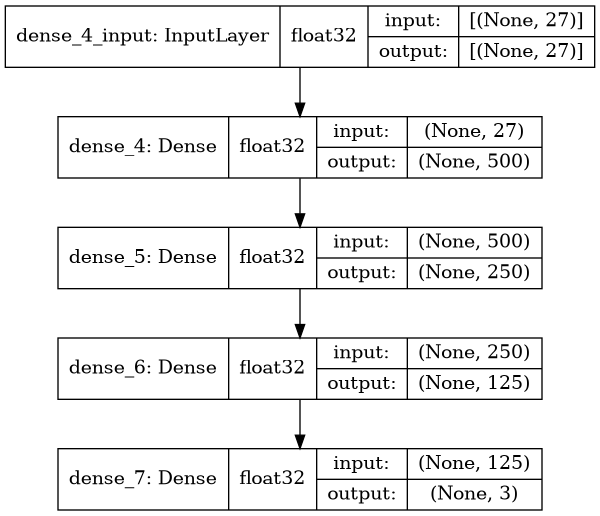

In [28]:
tf.keras.utils.plot_model(model,to_file="/home/master/Jibum/Motion_Show/HAR/my_model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [29]:
model.save("Axis_model.h5")
print("save!")

save!


Text(0, 0.5, 'Loss')

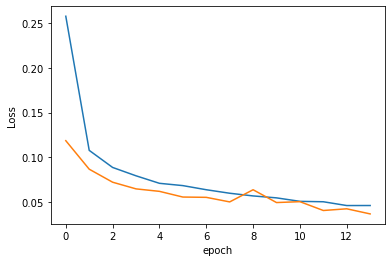

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

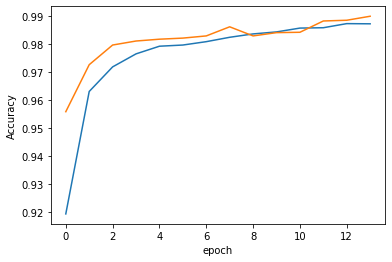

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epoch")
plt.ylabel("Accuracy")

In [32]:
loss, acc = model.evaluate(x_test,y_test, verbose=2)
print("기존 모델의 테스트 데이터정확도 : {:5.2f}%".format(100*acc))

301/301 - 0s - loss: 0.0385 - accuracy: 0.9898
기존 모델의 테스트 데이터정확도 : 98.98%


In [33]:
loss, acc = model.evaluate(x_val,y_val, verbose=2)
print("{}, {}%".format(x_val, y_val))
print("{}, {}%".format(type(x_val), type(y_val)))
print("기존 모델의 검증 데이터 정확도 : {:5.2f}%".format(100*acc))

241/241 - 0s - loss: 0.0366 - accuracy: 0.9899
[[ 0.33414096  0.68361602  0.47952572 ... -0.37193198  0.0680448
  -0.90120947]
 [-0.24030727  0.70516201  0.76533905 ... -0.15459072 -0.25310301
  -0.54179573]
 [ 1.35104969 -1.52411831 -1.742173   ...  0.62314456 -0.2960016
   1.32938021]
 ...
 [ 1.35544848 -1.37462184 -1.42788855 ... -1.06825174 -1.21921844
   1.06982396]
 [ 1.34500868  0.68673134  0.22566066 ... -0.15802449  0.10024139
  -0.40140787]
 [ 0.25996526  0.70615212  0.76650092 ... -0.30357665 -0.06319751
  -0.47535567]], [[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]%
<class 'numpy.ndarray'>, <class 'numpy.ndarray'>%
기존 모델의 검증 데이터 정확도 : 98.99%


In [34]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred)
print(y_test)

[0 2 0 ... 2 2 0]
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [35]:
pred = le.inverse_transform(pred)
print(pred)

['sit' 'walk' 'sit' ... 'walk' 'walk' 'sit']


In [36]:
new_model = create_model()

loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print("훈련되지 않은 모델 정확도 : {:5.2f}%".format(100*acc))

301/301 - 0s - loss: 1.2255 - accuracy: 0.3333
훈련되지 않은 모델 정확도 : 33.33%


In [37]:
load_model = tf.keras.models.load_model('Axis_model.h5')


loss,acc = load_model.evaluate(x_test, y_test, verbose=2)
print("저장된 모델의 정확도 : {:5.2f}%".format(100*acc))

301/301 - 0s - loss: 0.0385 - accuracy: 0.9898
저장된 모델의 정확도 : 98.98%
